In [1]:
from alfabeto_data import dissertation_images as di
from Continuo.kmeans_inversion import k_means_data, silhouette_analysis, label_maker_alf
from alfabeto_code.AlfabetoConverter import AlfabetoSymbols
from alfabeto_sources import all_sources

ready!


In [ ]:
from matplotlib import pyplot as plt
plt.close()
# print([x for x in range(1, len(key_data)+1)])

In [ ]:
temp_zmo = di.temperley_appender(di.zmo_notes_data)
temperleymarvin_maj = [('$\hat{1}$', .223), 
                       ('$♯\hat{1}/♭\hat{2}$', .006), 
                       ('$\hat{2}$', .12), 
                       ('$♯\hat{2}/♭\hat{3}$', .003), 
                       ('$\hat{3}$', .154), 
                       ('$\hat{4}$', .109), 
                       ('$♯\hat{4}/♭\hat{5}$', .019), 
                       ('$\hat{5}$', .189), 
                       ('$♯\hat{5}/♭\hat{6}$', .007), 
                       ('$\hat{6}$', .076), 
                       ('$♯\hat{6}/♭\hat{7}$', .005), 
                       ('$\hat{7}$', .089)]

temperleymarvin_min = [('$\hat{1}$', .189), 
                       ('$♯\hat{1}/♭\hat{2}$', .006), 
                       ('$\hat{2}$', .126), 
                       ('$♯\hat{2}/♭\hat{3}$', .144), 
                       ('$\hat{3}$', .014), 
                       ('$\hat{4}$', .106), 
                       ('$♯\hat{4}/♭\hat{5}$', .021), 
                       ('$\hat{5}$', .211), 
                       ('$♯\hat{5}/♭\hat{6}$', .068), 
                       ('$\hat{6}$', .02), 
                       ('$♯\hat{6}/♭\hat{7}$', .023), 
                       ('$\hat{7}$', .073)]

# key_data_maj = [x[1]*100 for x in temperleymarvin_maj]
# key_data_min = [x[1]*100 for x in temperleymarvin_min]
# key_names = [x[0] for x in temperleymarvin_maj]
# plt.figure(figsize=(10,5))
# plt.plot(range(1, len(key_data)+1), key_data_maj, color='blue', linestyle='-', marker='o', label='major')
# plt.plot(range(1, len(key_data)+1), key_data_min, color='green', linestyle='-', marker='o', label='minor')
# plt.xticks(range(1, len(key_data)+2), key_names, rotation=0, fontsize=12)
# plt.yticks(fontsize=12)

# legend = plt.legend(loc='upper right', shadow=True, fontsize='large')
# legend.get_frame().set_facecolor('#00FFCC')
# plt.xlabel('Scale Degrees', fontsize=14)
# plt.ylabel('Frequency of Use', fontsize=14)
# plt.title('Key Profiles from Temperley Marvin 2008', fontsize=18)
# plt.grid(True)
# plt.savefig('/home/daniel/Desktop/temperleymarvin.pdf', bbox_inches='tight')

In [ ]:
scale_degrees = []
for x in temperleymarvin_maj:
    scale_degrees.append(x[0])

In [ ]:
scale_degrees

In [ ]:
corpus = di.alfabeto_notes_data
name = 'alfabeto'

K = di.k_means_data(corpus[0], 2, di.label_maker_alfabeto(corpus[1]), 
#                     'C:/Users/Daniel/Desktop/kmeans/%s_notes.svg' % name)
                    '/home/daniel/Desktop/%s.pdf' % name)
# di.fitness_plotter(corpus[0], di.label_maker_alfabeto(corpus[1]), 12, 
#                 '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s_notes_score.pdf' % name)
# # print(K.labels_)
# # print(di.zma_notes_data[1])

In [2]:
def centroid_modes(corpus, corpus_name, number_of_modes, tonality):
    if tonality == 'modal':
        K = di.k_means_data(corpus[0], number_of_modes, di.label_maker_alfabeto(corpus[1]), 
                            '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, di.label_maker_alfabeto(corpus[1]))
        di.fitness_plotter_big(corpus[0], di.label_maker_alfabeto(corpus[1]), 12, 
                               '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s_notes_score.pdf' % corpus_name)
    elif tonality == 'tonal':
        K = di.k_means_data(corpus[0], number_of_modes, di.label_maker(corpus[1]), 
                            '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s.pdf' % corpus_name)
        C = di.k_means_simple(corpus[0], number_of_modes, di.label_maker(corpus[1]))
        di.fitness_plotter_big(corpus[0], di.label_maker(corpus[1]), 12, 
                               '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/%s_notes_score.pdf' % corpus_name)
    mode_labels = {'Ionian':[0, 2, 4, 5, 7, 9, 11],
               'Dorian':[0, 2, 3, 5, 7, 9, 10],
               'Phrygian':[0, 1, 3, 5, 7, 8, 10],
               'Lydian':[0, 2, 4, 6, 7, 9, 11],
               'Mixolydian':[0, 2, 4, 5, 7, 9, 10],
               'Aeolian':[0, 2, 3, 5, 7, 8, 10],
               'Harmonic minor':[0, 2, 3, 5, 7, 8, 11],
               'Melodic minor':[0, 2, 3, 5, 7, 9, 11],}
    
    cc = C['kmeans'].cluster_centers_
    l = C['kmeans'].labels_
    CC_final = []
    change_dict = {}
    for x, y in zip(K.labels_, l):
        if x not in change_dict:
            change_dict[x] = y
    for x in range(number_of_modes):
        CC_final.append(cc[change_dict[x]])
    for k in range(number_of_modes):
        top7 = sorted(CC_final[k],reverse=True)[0:7]
#         print(top7)
        scale = []
        for pc in CC_final[k]:
            if pc in top7:
                scale.append(list(CC_final[k]).index(pc))
        for a, j in mode_labels.items():
            if scale == j:
                print(str(k+1)+':', a)

def centroid_modes_continuo(bass_harmonization, corpus_name, number_of_modes, path): #for the bass harmonization data
    import numpy as np
    import csv
    K = di.k_means_data(bass_harmonization[0], number_of_modes, bass_harmonization[1], 
                        path+'%s_continuo.pdf' % corpus_name)
    C = di.k_means_simple(bass_harmonization[0], number_of_modes, bass_harmonization[1])
    di.fitness_plotter_big(bass_harmonization[0], bass_harmonization[1], 12,
                           path+'%s_continuo_score.pdf' % corpus_name)
    cc = C['kmeans'].cluster_centers_
    l = C['kmeans'].labels_
    CC_final = []
    change_dict = {}
    for x, y in zip(K.labels_, l):
        if x not in change_dict:
            change_dict[x] = y
    for x in range(number_of_modes):
        CC_final.append(cc[change_dict[x]])
    
    def csv_function(f_variable, path):
        with open(path, 'w', newline='') as fp:
            a = csv.writer(fp, delimiter='&')
            a.writerows(f_variable)
    def chunks(l, n):
        """Yield successive n-sized chunks from l."""
        uberlist = []
        for i in range(0, len(l), n):
            uberlist.append(l[i:i + n])
        return np.around(uberlist, decimals=1)
    print(CC_final)
    for x in range(len(CC_final)):
        csv_ready = list(CC_final[x])
#         csv_function(csv_ready,
        csv_function(chunks(csv_ready, 12), 
                     path+'%s%s_octave.csv' % (corpus_name, (x+1)))
#     csv_function(CC_final, '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/kmeans/continuo/%s_octave.csv' % corpus_name)
#     print(CC_final)
    return CC_final

def chord_frequency(corpus_list):
    all_chords = []
    all_labels =  label_maker_alf(corpus_list)
    for x in corpus_list:
        for y in x.values():
            alf_label_dict = {}
            for a in AlfabetoSymbols:
                alf_label_dict[a] = 0
            chord_number = 0
            temp_chords = []
            for z in y['alfabeto']:
                if z in AlfabetoSymbols:
                    alf_label_dict[z] += 1
                    chord_number += 1
            for x in range(len(AlfabetoSymbols)):
                temp_chords.append(alf_label_dict[AlfabetoSymbols[x]]/chord_number*100)
            all_chords.append(temp_chords)
    return all_chords, all_labels

n_digits: 2, 	 n_samples 529, 	 n_features 84
_______________________________________________________
init time inertia homo  compl v-meas ARI  AMI  silhouette
 k++ 0.81s  179494 0.279 0.787 0.412 0.309 0.275  0.240
rand 0.79s  179495 0.279 0.787 0.412 0.310 0.275  0.240
 PCA 0.58s  179495 0.279 0.787 0.412 0.310 0.275  0.240
_______________________________________________________


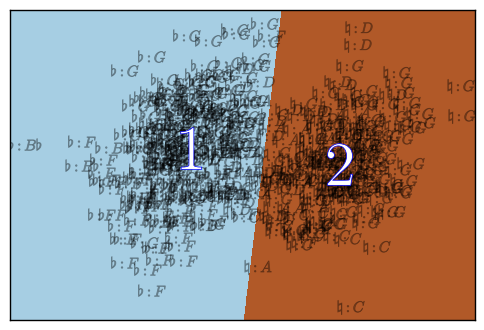

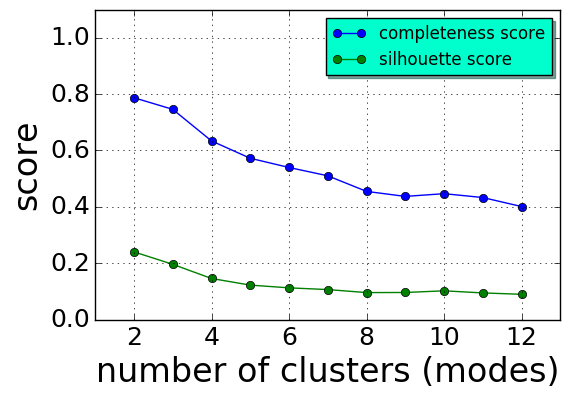

[array([  1.06639838e+01,   0.00000000e+00,   6.95736438e+00,
         4.08322582e+00,   4.84905109e-01,   1.48564320e+01,
         0.00000000e+00,   5.71248401e+00,   1.71525169e-02,
         2.60293868e+00,   1.09530161e+01,   2.22044605e-16,
         3.32236885e+00,   0.00000000e+00,   6.66132619e+00,
         0.00000000e+00,   7.35698417e-01,   3.56816862e-02,
         0.00000000e+00,   9.81259621e+00,   0.00000000e+00,
         3.63071472e+00,   0.00000000e+00,  -1.90819582e-17,
         0.00000000e+00,   2.18238661e-01,   8.37220994e-01,
        -6.07153217e-17,   1.63385600e+00,   0.00000000e+00,
         5.00645607e-01,   1.50418842e-01,   2.53447695e-02,
         1.59024695e+00,   0.00000000e+00,   4.51797274e-01,
         9.94662848e-02,   0.00000000e+00,   0.00000000e+00,
         7.26052873e-01,   0.00000000e+00,   1.54554200e-01,
         0.00000000e+00,  -8.67361738e-17,   1.73472348e-17,
         0.00000000e+00,   4.38478141e-01,   0.00000000e+00,
         1.92349631e-01

[array([  1.06639838e+01,   0.00000000e+00,   6.95736438e+00,
          4.08322582e+00,   4.84905109e-01,   1.48564320e+01,
          0.00000000e+00,   5.71248401e+00,   1.71525169e-02,
          2.60293868e+00,   1.09530161e+01,   2.22044605e-16,
          3.32236885e+00,   0.00000000e+00,   6.66132619e+00,
          0.00000000e+00,   7.35698417e-01,   3.56816862e-02,
          0.00000000e+00,   9.81259621e+00,   0.00000000e+00,
          3.63071472e+00,   0.00000000e+00,  -1.90819582e-17,
          0.00000000e+00,   2.18238661e-01,   8.37220994e-01,
         -6.07153217e-17,   1.63385600e+00,   0.00000000e+00,
          5.00645607e-01,   1.50418842e-01,   2.53447695e-02,
          1.59024695e+00,   0.00000000e+00,   4.51797274e-01,
          9.94662848e-02,   0.00000000e+00,   0.00000000e+00,
          7.26052873e-01,   0.00000000e+00,   1.54554200e-01,
          0.00000000e+00,  -8.67361738e-17,   1.73472348e-17,
          0.00000000e+00,   4.38478141e-01,   0.00000000e+00,
        

In [7]:
alf_letter = chord_frequency(all_sources.GetAll.all_alf)
centroid_modes_continuo(alfcont, 'untransposed', 2, '/home/daniel/Desktop/')

In [3]:
# alfcont = di.inversion_kmeans(di.GetAll.all_alf, 'all', di.label_maker_alfabeto)
# palcont = di.inversion_kmeans_corpus(di.palestrina_continuo, 'all', 'modal', di.label_maker_alfabeto)
# bachcont = di.inversion_kmeans_corpus(di.bach_continuo, 'all', 'tonal', di.label_maker)
# zma = di.inversion_kmeans_corpus(di.zma_continuo, 'all', 'modal', di.label_maker_alfabeto)
# zmo = di.inversion_kmeans_corpus(di.zmo_continuo, 'all', 'modal', di.label_maker_alfabeto)
# zso = di.inversion_kmeans_corpus(di.zso_continuo, 'all', 'modal', di.label_maker_alfabeto)
alfcont = di.inversion_kmeans_untransposed(di.GetAll.all_alf, 'all', di.label_maker_alfabeto)

# print(centroid_modes_continuo(palcont, 'palestrina', 2))



In [6]:
di.neato_function_bigrams(di.bigram_graphs_alfabeto(di.GetAll.all_alf, di.modal_minor, 'continuo'), .02, 
                          '/home/daniel/Dropbox/Apps/ShareLaTeX/DissertationFinal/figures/function/alfabetobigramminor.pdf')

In [ ]:
centroid_modes_continuo(palcont, 'palestrina', 2)
centroid_modes_continuo(bachcont, 'bach', 2)
centroid_modes_continuo(zma, 'zma', 2)
centroid_modes_continuo(zmo, 'zmo', 2)
centroid_modes_continuo(zso, 'zso', 2)
centroid_modes_continuo(alfcont, 'alfabeto', 2)



In [ ]:
list(p[0])

In [ ]:
chunks(list(p[0]), 12)

In [ ]:
mode_labels = {'ionian':[0, 2, 4, 5, 7, 9, 11],
               'dorian':[0, 2, 3, 5, 7, 9, 10],
               'phrygian':[0, 1, 3, 5, 7, 8, 10],
               'lydian':[0, 2, 4, 6, 7, 9, 11],
               'mixolydian':[0, 2, 4, 5, 7, 9, 10],
               'aeolian':[0, 2, 3, 5, 7, 8, 10],
               'harmonic minor':[0, 2, 3, 5, 7, 8, 11],
               'melodic minor':[0, 2, 3, 5, 7, 9, 11],}

In [ ]:
from scipy.spatial.distance import cdist

mode_names = []
mode_numbers = []

for a, j in mode_labels.items():
    mode_names.append(a)
    mode_numbers.append(j)
matrix = cdist(mode_numbers, mode_numbers, metric='hamming')

In [ ]:
lab = ['']+mode_names
matrixlab = []
for m, n in zip(mode_names, matrix):
    matrixlab.append([m]+list(n))

In [ ]:
f = [lab]+matrixlab
import csv
def csv_function(f_variable, path):
    with open(path, 'w', newline='') as fp:
        a = csv.writer(fp, delimiter=',')
        a.writerows(f_variable)
csv_function(f, '/home/daniel/Desktop/csv.csv')

In [ ]:
print(str(1)+'s')

In [ ]:
for x in cc[0]:
    print(x)

In [ ]:
e[2].index('I')

In [ ]:
e[1].index(31)

In [ ]:
s = []
starting = 0

for x in range(len(e[1])):
    length = e[1][x]
    print(starting, length)
    s.append(all_songs[starting:starting+length])
    starting += length